# Filtrado Espacial 


Mediana. Mínimo. Máximo. Blurred.

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
import cv2 as cv
from numpy.fft import fft,ifft
import matplotlib.pyplot as plt

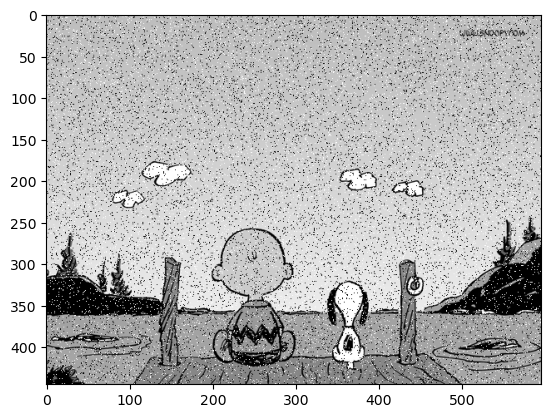

In [20]:
#Leer una imagen
img1 = cv.imread('salt-charlie.png')
plt.imshow(img1)

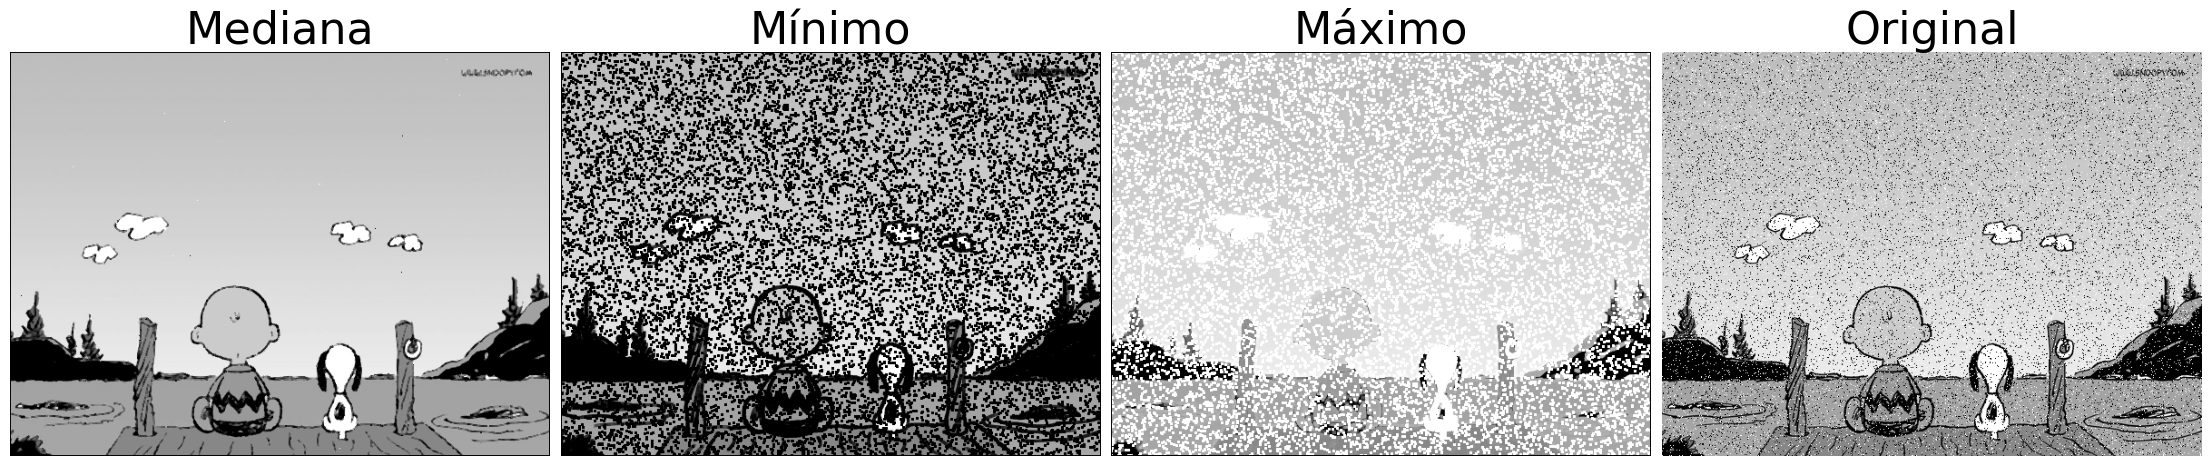

In [44]:
################### Filtrado de dominio espacial medio#####################################################
#Minímo y Máximo
# Canal R, y obtención de las filas y columnas de la imagen
img = img1[:,:,2]
m, n = img.shape
   
# Recorrer la imagen cada 3X3,
# encontrar la mediana de los píxeles y
# reemplaza el píxel central por la mediana
img_media = np.zeros([m, n])
img_minimo = np.zeros([m, n])
img_maximo = np.zeros([m, n])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img[i-1, j-1],
               img[i-1, j],
               img[i-1, j + 1],
               img[i, j-1],
               img[i, j],
               img[i, j + 1],
               img[i + 1, j-1],
               img[i + 1, j],
               img[i + 1, j + 1]]
        #La función sorted() devuelve una lista ordenada del objeto iterable especificado.  
        temp = sorted(temp)
        img_media[i, j]= temp[4]
        img_minimo[i, j]= temp[0]
        img_maximo[i, j]= temp[8]

img_media = img_media.astype(np.uint8)
img_minimo = img_minimo.astype(np.uint8)
img_maximo = img_maximo.astype(np.uint8)


fig, axes = plt.subplots(1, 4,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].imshow(img_media, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Mediana', fontsize=32)

axes[1].imshow(img_minimo, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mínimo', fontsize=32)

axes[2].imshow(img_maximo, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Máximo', fontsize=32)

axes[3].imshow(img1, cmap='gray')
axes[3].axis('off')
axes[3].set_title('Original', fontsize=32)
plt.show()

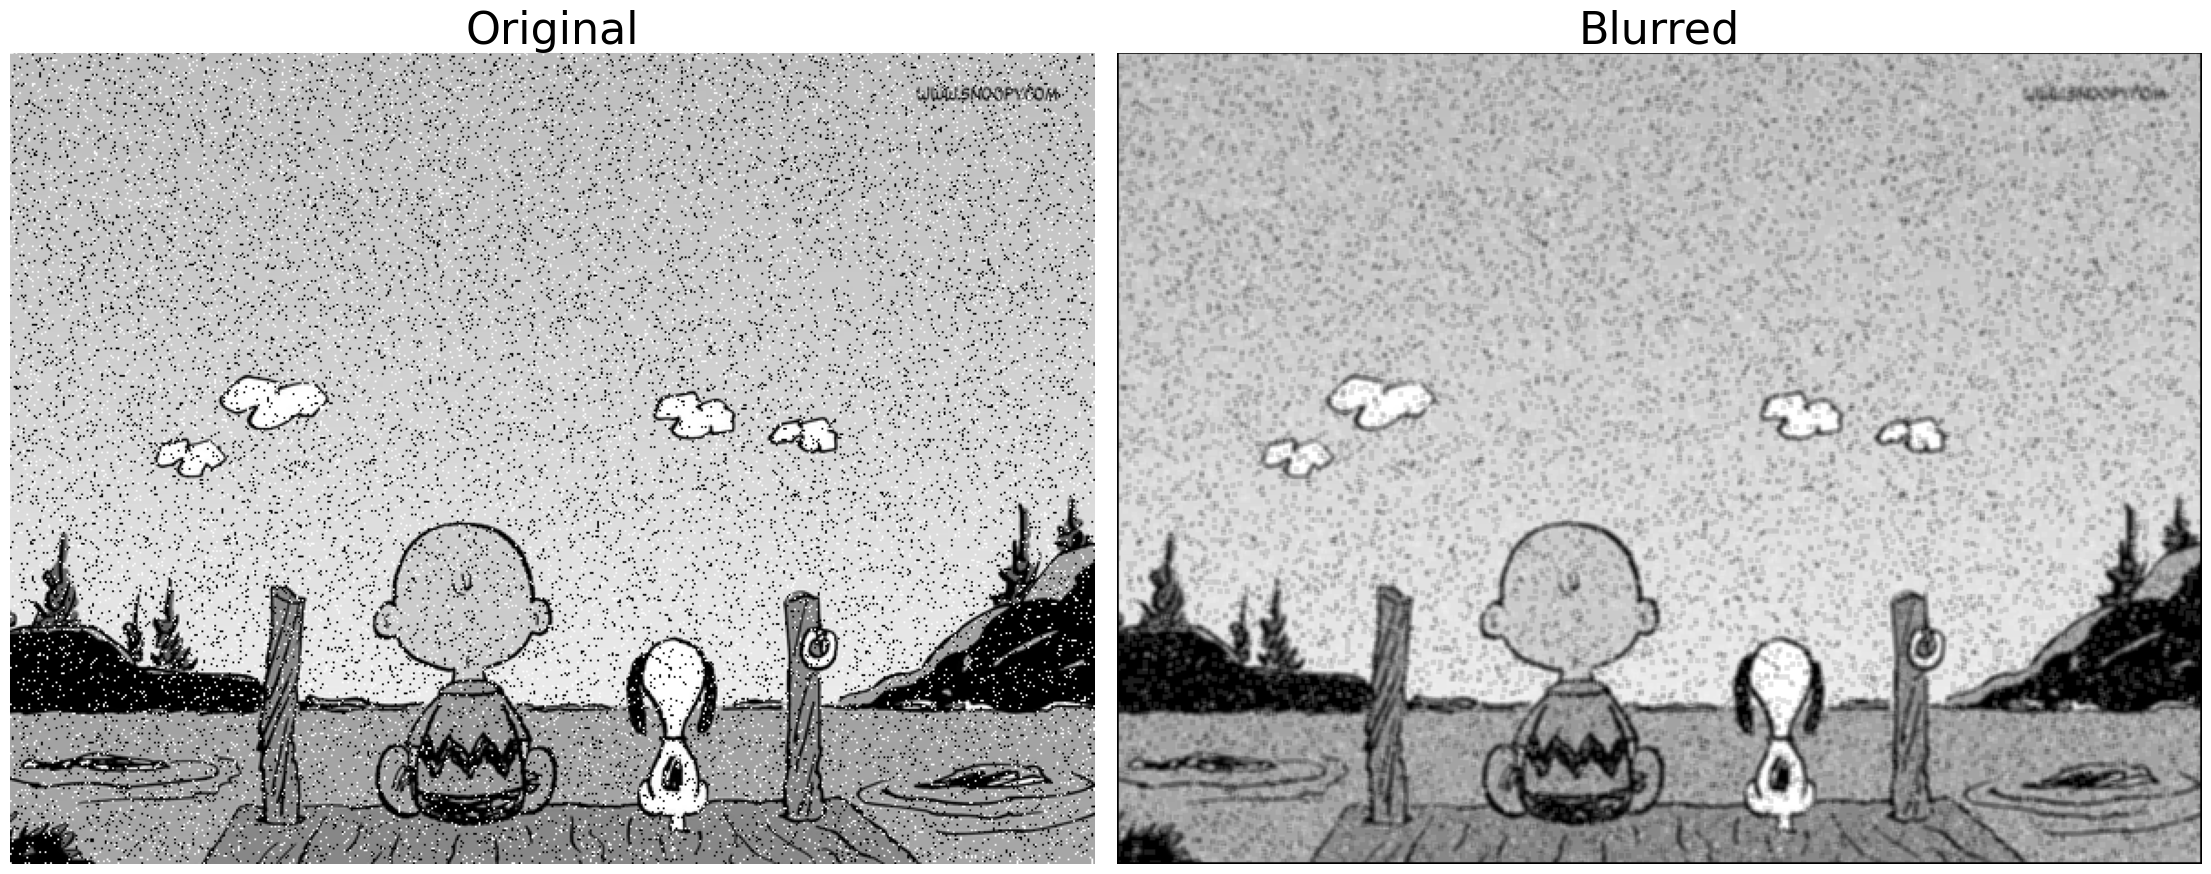

In [43]:
#Canal R, y obtención de las filas y columnas de la imagen
img = img1[:,:,2]
m, n = img.shape
   
# filtro y/o kernel 3x3/9
mask = np.ones([3, 3], dtype = int)
mask = mask / 9
   
# Convolución sobre la imagen
img_new = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
          
img_new = img_new.astype(np.uint8)
#Blurred >< Borroso
fig, axes = plt.subplots(1, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].imshow(img1, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original', fontsize=32)

axes[1].imshow(img_new, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Blurred', fontsize=32)

plt.show()